In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
telecom_data = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
telecom_data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
telecom_data.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [5]:
telecom_data['Churn']

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


# **Normalización de datos**

In [6]:
#Normalización de datos
telecom_costumer = pd.json_normalize(telecom_data['customer'])
telecom_phone = pd.json_normalize(telecom_data['phone'])
telecom_internet = pd.json_normalize(telecom_data['internet'])
telecom_account = pd.json_normalize(telecom_data['account'])

In [7]:
#Transformación de datos costumer
telecom_costumer.info()

telecom_costumer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [8]:
costumer_columns = ['Partner', 'Dependents']
telecom_costumer[costumer_columns] = telecom_costumer[costumer_columns].apply(lambda x: x.map({'Yes':1, 'No':0}))
telecom_costumer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


In [9]:
#Transformación de datos telefono
telecom_phone.info()

telecom_phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [10]:
telecom_phone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [11]:
telecom_phone['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
phone_columns = ['PhoneService', 'MultipleLines']
telecom_phone[phone_columns] = telecom_phone[phone_columns].apply(lambda x: x.map({'Yes':1, 'No':0, 'No phone service':0}))

In [13]:
telecom_phone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [14]:
#Transformación de datos internet
telecom_internet.info()

telecom_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [15]:
#telecom_internet['OnlineSecurity'].unique()
#telecom_internet['OnlineBackup'].unique()
#telecom_internet['DeviceProtection'].unique()
#telecom_internet['TechSupport'].unique()
#telecom_internet['StreamingTV'].unique()
telecom_internet['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
internet_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
telecom_internet[internet_columns] = telecom_internet[internet_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))
telecom_internet.head()


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


In [17]:
#Transformación de datos account
telecom_account.info()

telecom_account.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
#telecom_account['Contract'].unique() -> array(['One year', 'Month-to-month', 'Two year'], dtype=object)
#telecom_account['PaperlessBilling'].unique() -> array(['Yes', 'No']
#telecom_account['PaymentMethod'].unique() -> array(['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)'])
#telecom_account['Charges.Monthly'].unique()
#telecom_account['StreamingTV'].unique()


In [19]:
telecom_account['PaperlessBilling'] = telecom_account['PaperlessBilling'].map({'Yes':1, 'No':0}).fillna(0).astype(int)
telecom_account.info()
telecom_account.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   int64  
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 284.0+ KB


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,1,Mailed check,65.6,593.3
1,Month-to-month,0,Mailed check,59.9,542.4
2,Month-to-month,1,Electronic check,73.9,280.85
3,Month-to-month,1,Electronic check,98.0,1237.85
4,Month-to-month,1,Mailed check,83.9,267.4


##Incoherencias y su manejo

- Account
- Churn

Ambas presentan str vacíos, por ello se realiza un manejo especial de datos

In [20]:
account_voidData = telecom_account['Charges.Total'].str.strip().eq('').sum()
account_voidData


np.int64(11)

In [21]:
telecom_account['Charges.Total'] = pd.to_numeric(telecom_account['Charges.Total'].str.replace(r'[$,]','', regex=True),
                                                 errors='coerce').fillna(0)

In [22]:
telecom_account['Charges.Total'] = telecom_account['Charges.Total'].fillna(0).astype(np.float64)
telecom_account.info()
telecom_account.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   int64  
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 284.0+ KB


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,1,Mailed check,65.6,593.30
1,Month-to-month,0,Mailed check,59.9,542.40
2,Month-to-month,1,Electronic check,73.9,280.85
3,Month-to-month,1,Electronic check,98.0,1237.85
4,Month-to-month,1,Mailed check,83.9,267.40


In [23]:
churn_voidData = telecom_data['Churn'].str.strip().eq('').sum()
churn_voidData


np.int64(224)

In [24]:
telecom_data['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [25]:
telecom_data['Churn'] = telecom_data['Churn'].replace('', np.nan)
telecom_data.sample(7)

,customerID,Churn,customer,phone,internet,account
4978,6810-VCAEX,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
28,0042-JVWOJ,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
5803,7938-OUHIO,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
722,1035-IPQPU,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3170,4425-OWHWB,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
7075,9743-DQKQW,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1610,2277-VWCNI,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [26]:
churn_voidData = telecom_data['Churn'].str.strip().eq('').sum()
churn_voidData

np.int64(0)

# Cuentas Diarias

In [27]:
#El promedio de días por mes son aproximadamente 30.4167

telecom_account['Daily.Account'] = telecom_account['Charges.Monthly'] / 30.4167
telecom_account['Daily.Account'] = telecom_account['Daily.Account'].round(2)
telecom_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Daily.Account
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


## Creación del nuevo dataframe

In [28]:
#Eliminar las columnas anidadas originales del DataFrame
telecom_data.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

#Concatenar el DataFrame original con los nuevos datos normalizados
telecom_data = pd.concat([telecom_data, telecom_costumer, telecom_phone,telecom_internet, telecom_account], axis=1)

#Verificar los cambios
telecom_data.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Daily.Account
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


# Análisis descriptivo

In [29]:
telecom_data.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Daily.Account
4483,6142-VSJQO,Yes,Female,0,1,1,1,1,0,DSL,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),44.35,44.35,1.46
3409,4718-WXBGI,No,Male,0,1,1,72,1,1,DSL,...,1,1,1,1,Two year,1,Credit card (automatic),91.95,6614.90,3.02
1575,2240-HSJQD,No,Male,0,0,1,38,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,81.85,3141.70,2.69
5031,6877-TJMBR,Yes,Male,0,1,0,1,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Electronic check,84.80,84.80,2.79
504,0716-BQNDX,No,Male,1,0,0,57,1,1,Fiber optic,...,0,1,0,1,Two year,0,Electronic check,93.75,5625.55,3.08
2855,3957-SQXML,No,Female,0,1,1,34,1,1,No,...,0,0,0,0,Two year,0,Credit card (automatic),24.95,894.30,0.82
724,1038-RQOST,No,Male,0,1,1,19,1,0,No,...,0,0,0,0,Month-to-month,0,Mailed check,20.60,414.95,0.68
1775,2520-SGTTA,No,Female,0,1,1,0,1,0,No,...,0,0,0,0,Two year,0,Mailed check,20.00,0.00,0.66
3844,5264-IWHMU,NaN,Male,0,0,0,1,1,0,DSL,...,0,1,0,0,Month-to-month,0,Mailed check,49.05,49.05,1.61
471,0670-ANMUU,No,Male,0,0,0,71,1,1,Fiber optic,...,0,1,0,1,One year,0,Credit card (automatic),97.65,6687.85,3.21


In [30]:
telecom_data.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Daily.Account
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.127771
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.990534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.165000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.955000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [31]:
print(telecom_data['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# Distribución de evasión

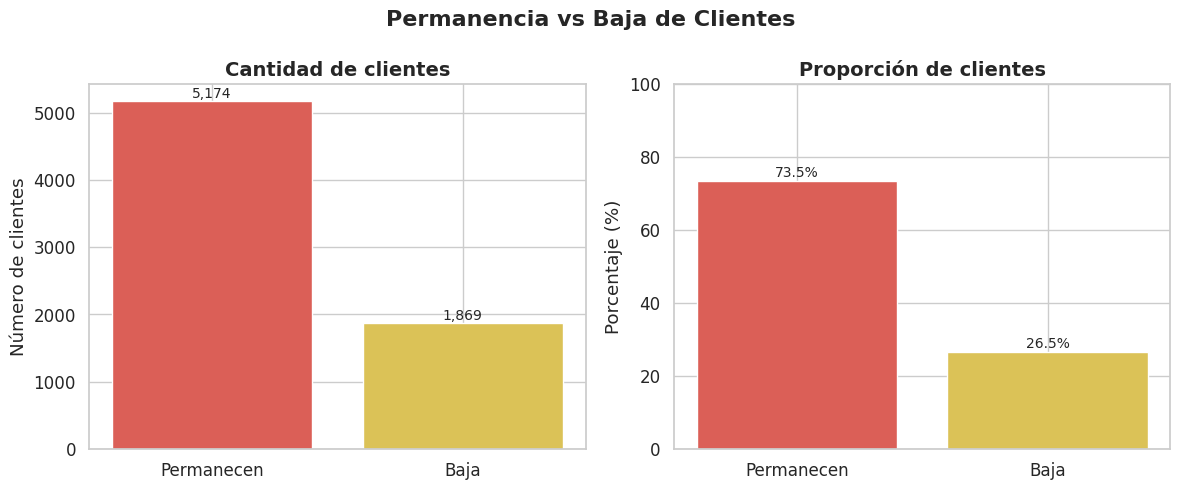

In [32]:
sns.set_theme(style="whitegrid", font_scale=1.1)

# Datos absolutos y porcentuales
count_abs = telecom_data['Churn'].value_counts().sort_index()
count_pct = telecom_data['Churn'].value_counts(normalize=True).sort_index() * 100

# Etiquetas
labels = ['Permanecen', 'Baja']

# Paleta de colores elegante
colors_graph = sns.color_palette("hls", 8)

# Crear figura con 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- Gráfico 1: Números absolutos ---
val_1 = axes[0].bar(labels, count_abs, color=colors_graph)
axes[0].set_title("Cantidad de clientes", fontsize=14, weight='bold')
axes[0].set_ylabel("Número de clientes")
for barra, valor in zip(val_1, count_abs):
    axes[0].text(barra.get_x() + barra.get_width()/2, valor + 50,
                 f'{valor:,}', ha='center', fontsize=10)

# --- Gráfico 2: Porcentajes ---
val_2 = axes[1].bar(labels, count_pct, color=colors_graph)
axes[1].set_title("Proporción de clientes", fontsize=14, weight='bold')
axes[1].set_ylabel("Porcentaje (%)")
axes[1].set_ylim(0, 100)
for barra, valor in zip(val_2, count_pct):
    axes[1].text(barra.get_x() + barra.get_width()/2, valor + 1,
                 f'{valor:.1f}%', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Recuento de evasión por variables categóricas

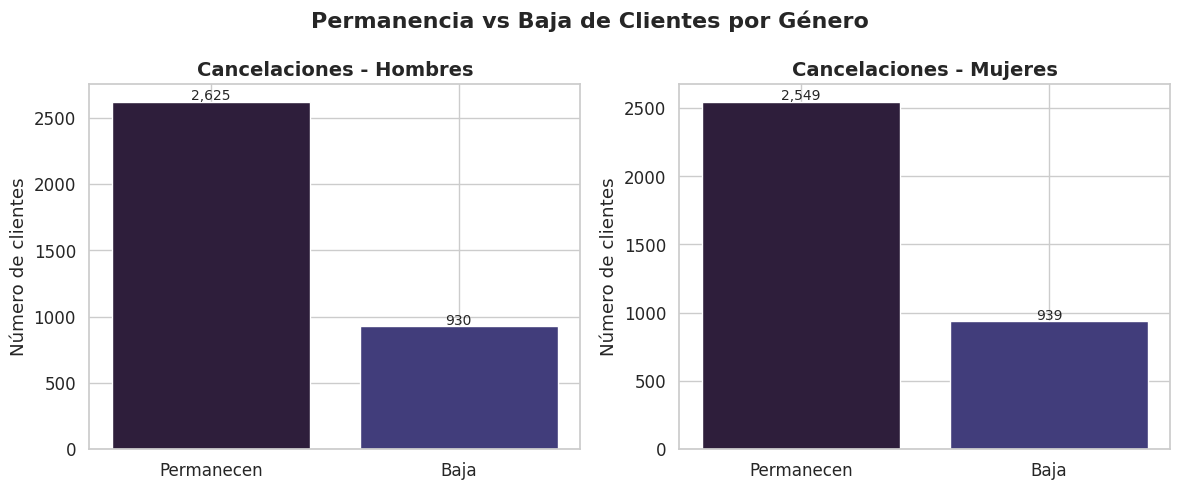

In [33]:
# Estilo profesional
sns.set_theme(style="whitegrid", font_scale=1.1)

# Filtrar por género
telecom_data_hombres = telecom_data[telecom_data['gender'] == 'Male']
telecom_data_mujeres = telecom_data[telecom_data['gender'] == 'Female']

# Datos absolutos
conteo_hombres = telecom_data_hombres['Churn'].value_counts().sort_index()
conteo_mujeres = telecom_data_mujeres['Churn'].value_counts().sort_index()

# Etiquetas
etiquetas = ['Permanecen', 'Baja']

# Paleta de colores elegante
colores = sns.color_palette("mako")

# Crear figura con 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- Gráfico Hombres ---
barras1 = axes[0].bar(etiquetas, conteo_hombres, color=colores)
axes[0].set_title("Cancelaciones - Hombres", fontsize=14, weight='bold')
axes[0].set_ylabel("Número de clientes")
for barra, valor in zip(barras1, conteo_hombres):
    axes[0].text(barra.get_x() + barra.get_width()/2, valor + 10,
                 f'{valor:,}', ha='center', fontsize=10)

# --- Gráfico Mujeres ---
barras2 = axes[1].bar(etiquetas, conteo_mujeres, color=colores)
axes[1].set_title("Cancelaciones - Mujeres", fontsize=14, weight='bold')
axes[1].set_ylabel("Número de clientes")
for barra, valor in zip(barras2, conteo_mujeres):
    axes[1].text(barra.get_x() + barra.get_width()/2, valor + 10,
                 f'{valor:,}', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes por Género", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

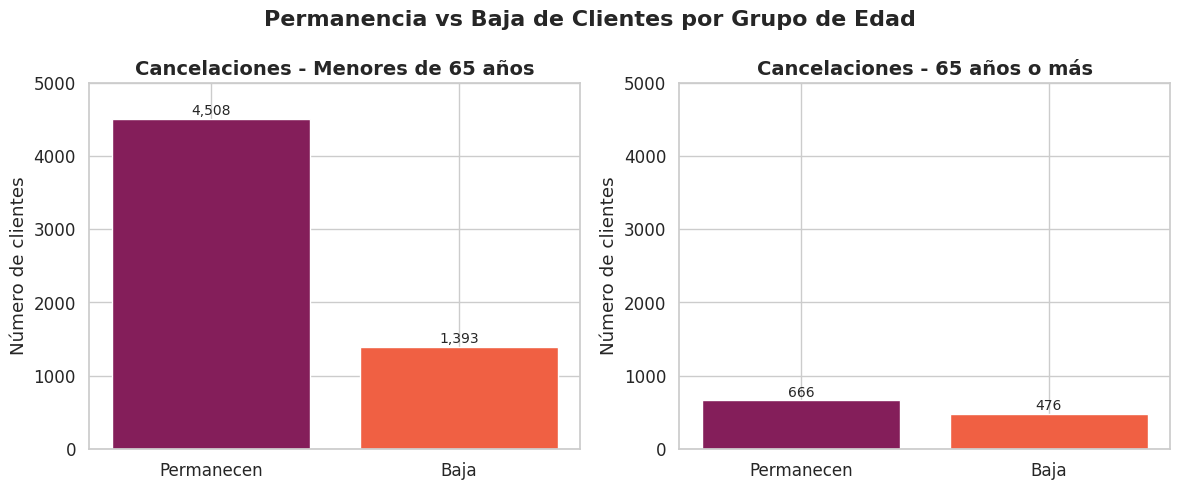

In [34]:
# Estilo profesional
sns.set_theme(style="whitegrid", font_scale=1.1)

# Crear columna de grupo de edad
telecom_data['grupoEdad'] = telecom_data['SeniorCitizen'].map({0: '< 65 años', 1: '≥ 65 años'})

# Filtrar por grupo de edad
SeniorCitizen_menor65 = telecom_data[telecom_data['grupoEdad'] == '< 65 años']
SeniorCitizen_mayor65 = telecom_data[telecom_data['grupoEdad'] == '≥ 65 años']

# Datos absolutos
conteo_menor65 = SeniorCitizen_menor65['Churn'].value_counts().sort_index()
conteo_mayor65 = SeniorCitizen_mayor65['Churn'].value_counts().sort_index()

# Etiquetas
labels_senior = ['Permanecen', 'Baja']

# Paleta de colores elegante
colores = sns.color_palette("rocket", 2)

# Crear figura con 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- Gráfico Menores de 65 ---
barras1 = axes[0].bar(labels_senior, conteo_menor65, color=colores)
axes[0].set_title("Cancelaciones - Menores de 65 años", fontsize=14, weight='bold')
axes[0].set_ylabel("Número de clientes")
axes[0].set_ylim(0, 5000)  # Limite fijo en 5000
for barra, valor in zip(barras1, conteo_menor65):
    axes[0].text(barra.get_x() + barra.get_width()/2, valor + 50,
                 f'{valor:,}', ha='center', fontsize=10)

# --- Gráfico Mayores o iguales a 65 ---
barras2 = axes[1].bar(labels_senior, conteo_mayor65, color=colores)
axes[1].set_title("Cancelaciones - 65 años o más", fontsize=14, weight='bold')
axes[1].set_ylabel("Número de clientes")
axes[1].set_ylim(0, 5000)  # Limite fijo en 5000
for barra, valor in zip(barras2, conteo_mayor65):
    axes[1].text(barra.get_x() + barra.get_width()/2, valor + 50,
                 f'{valor:,}', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes por Grupo de Edad", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Conteo de evasión por variables numéricas

In [35]:
numeric_num = [['Charges.Monthly','Charges.Total','Daily.Account']]

# Promedios y desviaciones por grupo
telecom_data.groupby('Churn')[['Charges.Monthly', 'Charges.Total', 'Daily.Account']].agg(['mean', 'std']).round(2)

Charges.Monthly        Charges.Total          Daily.Account      
                 mean    std          mean      std          mean   std
Churn                                                                  
No              61.27  31.09       2549.91  2329.95          2.01  1.02
Yes             74.44  24.67       1531.80  1890.82          2.45  0.81

In [37]:
numeric_column = numeric_num[0]

In [38]:
color_1 = '#408EF5'
color_2 = '#6540F5'
color_3 = '#2CC2F5'
color_4 = '#7549F5'

In [44]:
def boxplot_cancelacion(numeric_column):

  plt.figure(figsize=(15, 5))
  plt.gcf().set_facecolor('#F2F2F2')  # Fondo claro

  for i, columna in enumerate(numeric_column):
      plt.subplot(1, 3, i + 1)

      # Boxplot con alternancia de colores
      sns.boxplot(
      x='Churn',
      y=columna,
      hue='Churn',
      data=telecom_data,
      showfliers=False,
      palette=[color_1, color_2],
      legend=False
     )

            # Título en GRIS
      plt.title(f'{columna.replace("_", " ").capitalize()} según cancelación', fontsize=16, color=color_3)

      # Eje X
      plt.xlabel('Canceló', fontsize=12, color=color_4)
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=color_4)

      # Eje Y
      plt.ylabel(columna.replace('_', ' ').capitalize(), fontsize=12, color=color_4)
      plt.tick_params(axis='y', labelsize=12, colors=color_4)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt

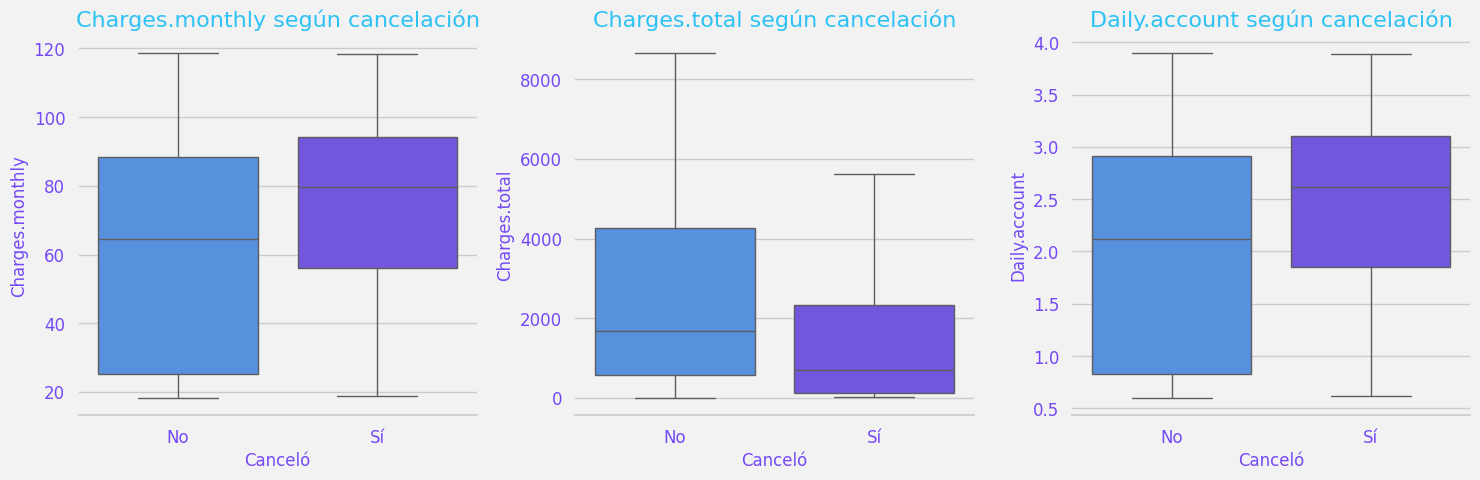

In [45]:
boxplot_cancelacion(numeric_column).show()

# Informe final

## Introducción
El análisis de cancelación es fundamental para entender por qué los clientes abandonan un servicio. Este estudio se centra en identificar los factores clave que contribuyen a la baja de clientes para poder tomar medidas proactivas. A través de la visualización de datos, exploraremos la relación entre la permanencia de los clientes y variables demográficas, contractuales y de pago.

El objetivo final es proporcionar recomendaciones estratégicas para retener a los clientes y reducir la tasa de cancelación.

### *Análisis Exploratorio de Datos*

1. Permanencia vs. Baja General 📊
El análisis inicial muestra una base de clientes de 7,043, de los cuales 5,174 (73.5%) permanecen y 1,869 (26.5%) se han dado de baja. Esta tasa de cancelación del 26.5% es significativa y resalta la necesidad de una estrategia de retención.

2. Segmentación por Género y Edad 🧑‍🦳

- Género: Los datos muestran una distribución de bajas casi idéntica entre hombres y mujeres (930 vs. 939), lo que indica que el género no es un factor determinante en la decisión de cancelar el servicio.

- Edad: La edad sí es un factor crucial. Los clientes mayores de 65 años tienen una tasa de baja considerablemente más alta (41.7%) en comparación con el grupo de menores de 65 años (23.6%).

3. Tipo de Contrato y Duración ⏳
Este es el factor más influyente. Existe una correlación inversa clara entre la duración del contrato y la tasa de cancelación:

- Contrato mes a mes: Tiene la tasa de baja más alta, con un 42.7% de los clientes cancelando.

- Contrato de un año: La tasa cae drásticamente a un 11.3%.

- Contrato de dos años: La tasa de cancelación es mínima, con solo un 2.8%.

Este patrón se confirma con el gráfico de meses de contrato, que muestra que los clientes que cancelan tienen un promedio de permanencia mucho más corto que aquellos que se quedan.

4. Método de Pago y Cargos 💳

- Método de Pago: El método de pago más vulnerable es el cheque electrónico, con una tasa de baja del 45.4%. Los otros métodos (tarjeta de crédito, cheque por correo, transferencia bancaria) tienen tasas de cancelación inferiores al 20%.

- Cargos Mensuales y Totales: Los clientes que cancelan tienden a tener cargos mensuales más altos, pero sus cargos totales son más bajos debido a la corta duración de su servicio.

### *Conclusiones e Insights*

- Identificación de los clientes en riesgo: Los clientes con mayor probabilidad de cancelar son aquellos con un contrato mes a mes, que utilizan cheque electrónico como método de pago y que se encuentran en el grupo de 65 años o más.

- El contrato es el principal factor: La duración del contrato es el predictor más fuerte de la permanencia. Los contratos a largo plazo son una herramienta efectiva para la retención.

- Comportamiento de pago y cargos: La alta tasa de cancelación asociada con el cheque electrónico sugiere posibles problemas de usabilidad o satisfacción con este método. Además, los clientes que se van sienten un mayor peso en sus facturas mensuales, lo que podría indicar una percepción de bajo valor por el precio.

### *Recomendaciones*

- Promover Contratos a Largo Plazo:

  - Ofrecer descuentos significativos o beneficios adicionales (p. ej., un mes gratis, servicio premium) a los clientes que opten por contratos de uno o dos años.

  - Mejorar la experiencia de los contratos a largo plazo, como la facilidad para renovar o modificar servicios.

- Mitigar el Riesgo de Clientes Mayores:

  - Diseñar ofertas o planes específicos que se adapten a las necesidades y preferencias de los clientes mayores de 65 años.

  - Reforzar el soporte al cliente y ofrecer asistencia personalizada para asegurar que se sientan valorados y bien atendidos.

- Abordar el Problema del Cheque Electrónico:

  - Investigar las razones detrás de la alta tasa de "churn" en este grupo. Podría ser un problema técnico, de experiencia de usuario o simplemente una coincidencia.

  - Incentivar la transición a métodos de pago automáticos y más estables, como la tarjeta de crédito o la transferencia bancaria, ofreciendo pequeñas recompensas o un proceso de cambio simplificado.

- Optimizar los Cargos Mensuales:

  - Revisar los planes de precios para los clientes con facturas mensuales elevadas. Ofrecer opciones para reducir el costo, como la reducción de servicios o planes de tarifa plana.

 - Comunicar de forma clara el valor que se obtiene por el precio para evitar la percepción de que el servicio es demasiado caro.